In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
!gdown https://drive.google.com/file/d/1d3syBQk3UitOHjSL1p9I7Z083eL_qgEZ/view?usp=share_link
!gdown https://drive.google.com/file/d/1Pc6DgUYnVVl0lElx6pT0wSvd84Rxq4KP/view?usp=share_link


'gdown' is not recognized as an internal or external command,
operable program or batch file.
'gdown' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding, Dropout
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd
import tensorflow as tf
import os

import nltk # NLP  
from nltk.corpus import stopwords  
from nltk.stem import WordNetLemmatizer 
from nltk.stem import PorterStemmer 
import re  

# visualization 
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
%matplotlib inline

ModuleNotFoundError: No module named 'keras.preprocessing.text'

Dataset overview

In [4]:
# seed initialization
np.random.seed(0)
tf.random.set_seed(0)

NameError: name 'tf' is not defined

In [ ]:
Fake_df = pd.read_csv('../content/Fake.csv')
True_df = pd.read_csv('../content/Fake.csv')
Fake_df.shape, True_df.shape

((23481, 4), (23481, 4))

In [ ]:
Fake_df.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
True_df.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


concatenate 2 files in 1

In [ ]:
Fake_df['target'] = 0
True_df['target'] = 1

In [ ]:
# data merge
df = pd.concat([True_df, Fake_df], ignore_index=True, sort=False)
# ignore_index, sort
df.head()

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1


In [ ]:
import random
df = df.sample(df.shape[0])
df.head()

,title,text,subject,date,target
11155,BILL O’REILLY ANNOUNCES 2 Week Vacation…Will M...,Embattled Fox News host Bill O Reilly announce...,politics,"Apr 12, 2017",1
2079,Trump Stands By Wiretapping Lie Despite EVERY...,According to White House Press Secretary Sean ...,News,"March 20, 2017",1
38852,BOOM! Trump Shows How A Good Business Mind Nev...,No wonder America loves this guy so much. It s...,politics,"Aug 4, 2015",0
32895,WHOOPI GOLDBERG RANTS: ‘Stupidest Thing’ That ...,Well this is a shocker! The usual leftist slan...,politics,"Nov 16, 2017",0
35256,STUDY SHOWS UP TO 2.8 MILLION Non U.S. Citizen...,One California resident commented: Lots of ill...,politics,"Jan 30, 2017",0


In [ ]:
print(True_df.isna().sum(), Fake_df.isna().sum(), sep='\n\n')

title      0
text       0
subject    0
date       0
target     0
dtype: int64

title      0
text       0
subject    0
date       0
target     0
dtype: int64


Graph for df

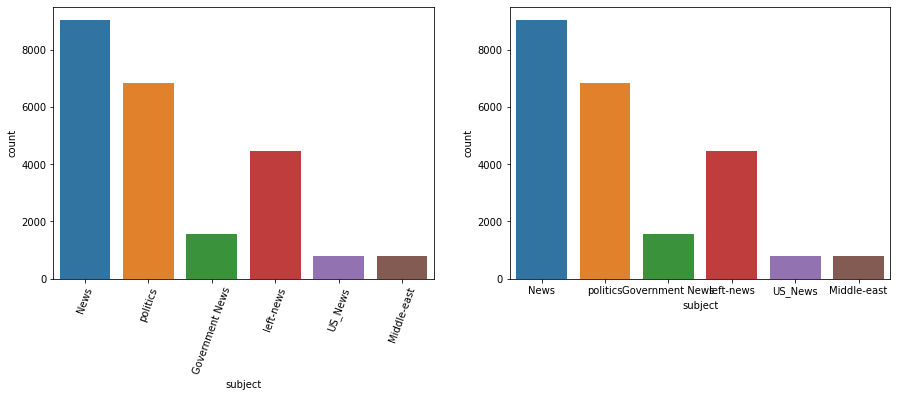

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) 

# Fake_df & True_df
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.countplot('subject', data=Fake_df)
plt.xticks(rotation =70)

plt.subplot(1, 2, 2)
sns.countplot('subject', data=True_df)
plt.show()

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

Frequent words

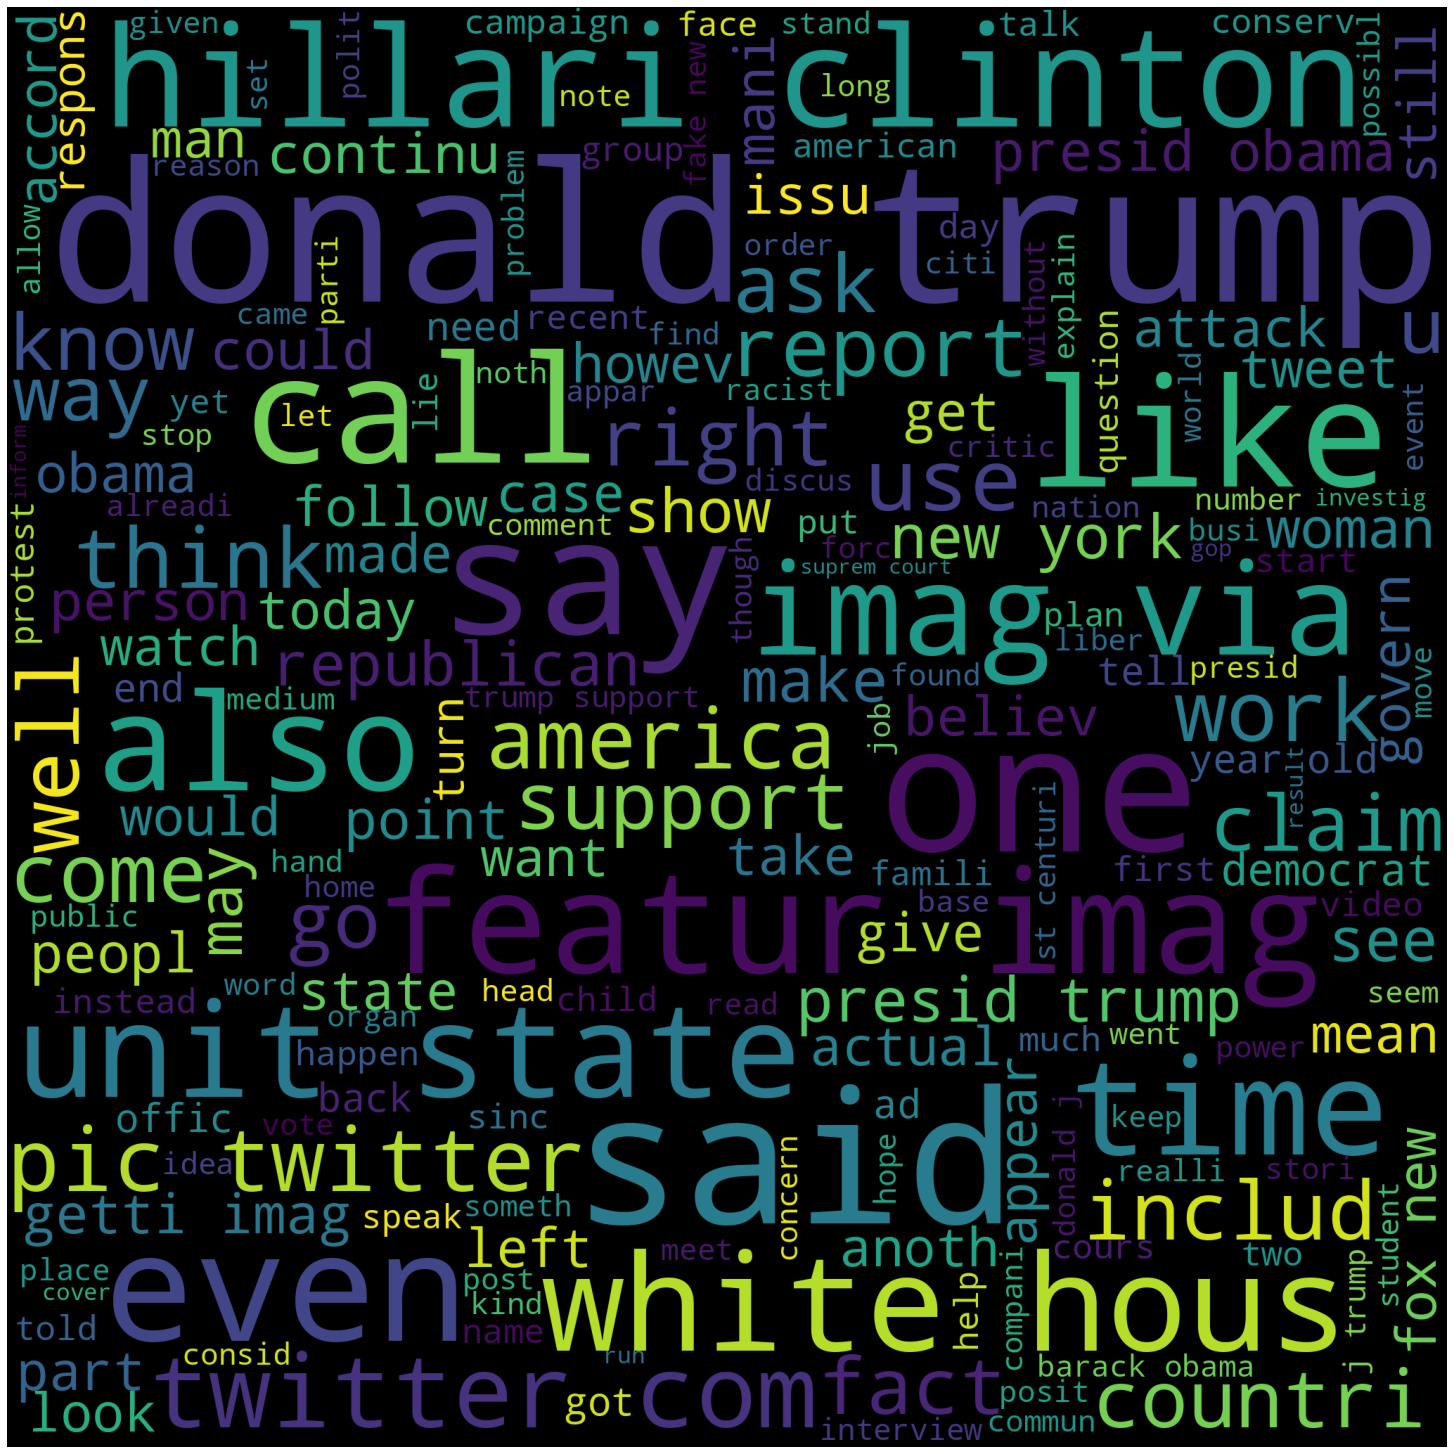

In [ ]:
# Word_Cloud
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

comment_words = '' 
stopwords = set(stop_words) 
  
# iterate through the csv file 
for val in df[df['target']==1]['text']: 
      
    # typecaste each val to string 
    val = str(val) 
  

    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 2048, height = 2048, 
                background_color ='black', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (20, 20), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

Data cleaning:

remove punctuations
remove non alphabets
convert Upper to Lower
remove stopwords
Lemmatizer: why? In morphology and lexicography, a lemma is the canonical form, dictionary form, or citation form of a set of words (headword). In English, for example, break, breaks, broke, broken and breaking are forms of the same lexeme, with break as the lemma by which they are indexed. Lemmatization stems the word but makes sure that it does not lose its meaning. Lemmatization has a pre-defined dictionary that stores the context of words and checks the word in the dictionary while diminishing.
URL removal?

In [ ]:
#leave just text and title, because only this have to be cleanned now
df['text'] = df['title'] + ' ' + df['text'] # 'politicsNews About trump he was a president'

del df['title']
del df['subject']
del df['date']

df.head()

,text,target
11155,BILL O’REILLY ANNOUNCES 2 Week Vacation…Will M...,1
2079,Trump Stands By Wiretapping Lie Despite EVERY...,1
38852,BOOM! Trump Shows How A Good Business Mind Nev...,0
32895,WHOOPI GOLDBERG RANTS: ‘Stupidest Thing’ That ...,0
35256,STUDY SHOWS UP TO 2.8 MILLION Non U.S. Citizen...,0


Visualization purpose: clean the first article only

In [ ]:
first_text = df['text'][0]
first_text

' Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and  the very dishonest fake news media.  The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year,  President Angry Pants tweeted.  2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America!  Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s greeting like this 

In [ ]:
!pip install contractions


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 KB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.5/287.5 KB 17.3 MB/s eta 0:00:00


In [ ]:
import contractions
first_text =  ' '.join([contractions.fix(word) for word in first_text.split()])
first_text

'Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and the very dishonest fake news media. The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year, President Angry Pants tweeted. 2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America! Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s greeting like this despic

In [ ]:
first_text = re.sub('\[[^]]*\]', ' ', first_text) # remove punctuations
first_text = re.sub('[^a-zA-Z]',' ',first_text)  # replaces non-alphabets with spaces
first_text = first_text.lower() # Converting from uppercase to lowercase
first_text

'donald trump sends out embarrassing new year s eve message  this is disturbing donald trump just couldn t wish all americans a happy new year and leave it at that  instead  he had to give a shout out to his enemies  haters and the very dishonest fake news media  the former reality show star had just one job to do and he couldn t do it  as our country rapidly grows stronger and smarter  i want to wish all of my friends  supporters  enemies  haters  and even the very dishonest fake news media  a happy and healthy new year  president angry pants tweeted       will be a great year for america  as our country rapidly grows stronger and smarter  i want to wish all of my friends  supporters  enemies  haters  and even the very dishonest fake news media  a happy and healthy new year       will be a great year for america  donald j  trump   realdonaldtrump  december         trump s tweet went down about as welll as you d expect what kind of president sends a new year s greeting like this despic

In [ ]:
# is, not, an: stopwords
from nltk.corpus import stopwords
first_text = nltk.word_tokenize(first_text)
first_text = [word for word in first_text if not word in set(stopwords.words('english'))]

In [ ]:
first_text = ' '.join(first_text)
first_text

'donald trump sends embarrassing new year eve message disturbing donald trump wish americans happy new year leave instead give shout enemies haters dishonest fake news media former reality show star one job country rapidly grows stronger smarter want wish friends supporters enemies haters even dishonest fake news media happy healthy new year president angry pants tweeted great year america country rapidly grows stronger smarter want wish friends supporters enemies haters even dishonest fake news media happy healthy new year great year america donald j trump realdonaldtrump december trump tweet went welll expect kind president sends new year greeting like despicable petty infantile gibberish trump lack decency even allow rise gutter long enough wish american citizens happy new year bishop talbert swan talbertswan december one likes calvin calvinstowell december impeachment would make great year america also accept regaining control congress miranda yaver mirandayaver december hear talk 

In [ ]:
#importing the Stemming function from nltk library
from nltk.stem.porter import PorterStemmer
#defining the object for stemming
stemmer = PorterStemmer()
first_text =  ' '.join([stemmer.stem(word) for word in first_text.split()])
first_text

'donald trump send embarrass new year eve messag disturb donald trump wish american happi new year leav instead give shout enemi hater dishonest fake news media former realiti show star one job countri rapidli grow stronger smarter want wish friend support enemi hater even dishonest fake news media happi healthi new year presid angri pant tweet great year america countri rapidli grow stronger smarter want wish friend support enemi hater even dishonest fake news media happi healthi new year great year america donald j trump realdonaldtrump decemb trump tweet went welll expect kind presid send new year greet like despic petti infantil gibberish trump lack decenc even allow rise gutter long enough wish american citizen happi new year bishop talbert swan talbertswan decemb one like calvin calvinstowel decemb impeach would make great year america also accept regain control congress miranda yaver mirandayav decemb hear talk includ mani peopl hate wonder hate alan sandov alansandov decemb use

In [ ]:
word_list = first_text.split()
number_of_words = len(word_list)
print(number_of_words)

275


In [ ]:
#importing the Lemming function from nltk library
from nltk.stem import WordNetLemmatizer
#defining the object for Lemmatization
lemmatizer = WordNetLemmatizer()
#defining a function for lemming
first_text = ' '.join(lemmatizer.lemmatize(word) for word in first_text.split())
first_text

'donald trump send embarrass new year eve messag disturb donald trump wish american happi new year leav instead give shout enemi hater dishonest fake news medium former realiti show star one job countri rapidli grow stronger smarter want wish friend support enemi hater even dishonest fake news medium happi healthi new year presid angri pant tweet great year america countri rapidli grow stronger smarter want wish friend support enemi hater even dishonest fake news medium happi healthi new year great year america donald j trump realdonaldtrump decemb trump tweet went welll expect kind presid send new year greet like despic petti infantil gibberish trump lack decenc even allow rise gutter long enough wish american citizen happi new year bishop talbert swan talbertswan decemb one like calvin calvinstowel decemb impeach would make great year america also accept regain control congress miranda yaver mirandayav decemb hear talk includ mani peopl hate wonder hate alan sandov alansandov decemb 

In [ ]:
word_list = first_text.split()
number_of_words = len(word_list)
print(number_of_words)

275


Data cleaning All:

different wordtokenize & split
if str have more than 2 blink, wordtokenize can delete all blink. split can't

In [ ]:
def remove_punctuations(text):
    return re.sub('\[[^]]*\]', '', text)

def remove_characters(text):
    return re.sub('[^a-zA-Z]', ' ', text)

def remove_url(text):
    return re.sub(r'http\S+', '', text)

import contractions
def remove_contractions(text):
    return ' '.join([contractions.fix(word) for word in text.split()])

from nltk.corpus import stopwords
stop_words = stopwords.words('english')
def remove_stopwords(text):
    return ' '.join([word for word in nltk.word_tokenize(text) if word not in stop_words])
# str(text).split()

#importing the Lemming function from nltk library
from nltk.stem import WordNetLemmatizer
#defining the object for Lemmatization
lemmatizer = WordNetLemmatizer()
#defining a function for lemming
def lemmatize_words(text):
    return ' '.join(lemmatizer.lemmatize(word) for word in text.split())

#importing the Stemming function from nltk library
from nltk.stem.porter import PorterStemmer
#defining the object for stemming
stemmer = PorterStemmer()
#defining a function for stemming
def stemming_words(text):
    return ' '.join(stemmer.stem(word) for word in text.split())

def clean_text(text):
    text = remove_url(text)
    text = remove_contractions(text)
    text = text.lower()
    text = remove_punctuations(text)
    text = remove_characters(text)
    text = remove_stopwords(text)
    text = stemming_words(text)
    text = lemmatize_words(text)
    return text
    
# apply
df['text'] = df['text'].apply(clean_text)

In [ ]:
#I random selected to display data head sowhere above
df.head()

,text,target
11155,bill reilli announc week vacat murdoch liber s...,1
2079,trump stand wiretap lie despit everi investig ...,1
38852,boom trump show good busi mind never let u opp...,0
32895,whoopi goldberg rant stupidest thing ucla play...,0
35256,studi show million non citizen vote trump craz...,0
